In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
steps_df = pd.read_csv("2011_12_step.txt", delim_whitespace=True, index_col=0)

In [5]:
steps_df

,step
star,
1,0.854897
2,0.953955
3,0.928070
4,0.925684
5,0.926050
...,...
2504,0.957866
2505,0.843457
2506,NaN


In [6]:
positions_df = pd.read_csv("../positions.txt", delim_whitespace=True, index_col=0)

In [7]:
positions_df

,x,y
star,,
1,746.58,459.64
2,547.57,493.95
3,462.38,523.01
4,230.97,347.20
5,112.45,420.52
...,...,...
2504,197.88,102.53
2505,813.48,940.59
2506,360.44,979.31


In [8]:
fwhm_df_2011 = pd.read_csv("../2011_fwhm.txt", delim_whitespace=True, index_col=0)

In [9]:
fwhm_df_2011

,x_fwhm,y_fwhm,avg_fwhm
star,,,
1,4.1177,3.31570,3.31570
2,3.4497,2.91625,2.91625
3,3.3752,3.05780,3.05780
4,2.5518,2.56620,2.56620
5,2.7057,2.69190,2.69190
...,...,...,...
2504,6.7891,3.87420,3.87420
2505,7.7592,5.13400,5.13400
2506,5.1724,0.00000,0.00000


In [10]:
fwhm_df_2012 = pd.read_csv("../2012_fwhm.txt", delim_whitespace=True, index_col=0)

In [11]:
fwhm_df_2012

,x_fwhm,y_fwhm,avg_fwhm
star,,,
1,3.40940,3.18050,3.18050
2,2.77300,2.64860,2.64860
3,2.76135,2.73610,2.73610
4,2.62780,2.60430,2.60430
5,2.81520,2.72210,2.72210
...,...,...,...
2504,7.17770,3.59220,3.59220
2505,6.18685,3.75525,3.75525
2506,0.00000,0.00000,0.00000


In [12]:
df = pd.merge(fwhm_df_2011, fwhm_df_2012, on="star", suffixes=("_2011", "_2012"))
df = df.merge(positions_df, on="star")
df = df.merge(steps_df, on="star")

In [13]:
df

,x_fwhm_2011,y_fwhm_2011,avg_fwhm_2011,x_fwhm_2012,y_fwhm_2012,avg_fwhm_2012,x,y,step
star,,,,,,,,,
1,4.1177,3.31570,3.31570,3.40940,3.18050,3.18050,746.58,459.64,0.854897
2,3.4497,2.91625,2.91625,2.77300,2.64860,2.64860,547.57,493.95,0.953955
3,3.3752,3.05780,3.05780,2.76135,2.73610,2.73610,462.38,523.01,0.928070
4,2.5518,2.56620,2.56620,2.62780,2.60430,2.60430,230.97,347.20,0.925684
5,2.7057,2.69190,2.69190,2.81520,2.72210,2.72210,112.45,420.52,0.926050
...,...,...,...,...,...,...,...,...,...
2504,6.7891,3.87420,3.87420,7.17770,3.59220,3.59220,197.88,102.53,0.957866
2505,7.7592,5.13400,5.13400,6.18685,3.75525,3.75525,813.48,940.59,0.843457
2506,5.1724,0.00000,0.00000,0.00000,0.00000,0.00000,360.44,979.31,NaN


In [14]:
df["x_fwhm_ratio"] = df["x_fwhm_2011"] / df["x_fwhm_2012"]
df["y_fwhm_ratio"] = df["y_fwhm_2011"] / df["y_fwhm_2012"]
df["avg_fwhm_ratio"] = df["avg_fwhm_2011"] / df["avg_fwhm_2012"]

In [15]:
df_filtered = df[
    (df["x_fwhm_ratio"] > 0) 
    & ((df["x_fwhm_ratio"] < np.inf))
    & (df["y_fwhm_ratio"] > 0) 
    & (df["y_fwhm_ratio"] < np.inf) 

]

In [16]:
df_filtered.dropna(inplace=True)

/tmp/ipykernel_344188/208647654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [17]:
df_filtered

,x_fwhm_2011,y_fwhm_2011,avg_fwhm_2011,x_fwhm_2012,y_fwhm_2012,avg_fwhm_2012,x,y,step,x_fwhm_ratio,y_fwhm_ratio,avg_fwhm_ratio
star,,,,,,,,,,,,
1,4.11770,3.31570,3.31570,3.40940,3.18050,3.18050,746.58,459.64,0.854897,1.207749,1.042509,1.042509
2,3.44970,2.91625,2.91625,2.77300,2.64860,2.64860,547.57,493.95,0.953955,1.244032,1.101053,1.101053
3,3.37520,3.05780,3.05780,2.76135,2.73610,2.73610,462.38,523.01,0.928070,1.222301,1.117576,1.117576
4,2.55180,2.56620,2.56620,2.62780,2.60430,2.60430,230.97,347.20,0.925684,0.971078,0.985370,0.985370
5,2.70570,2.69190,2.69190,2.81520,2.72210,2.72210,112.45,420.52,0.926050,0.961104,0.988906,0.988906
...,...,...,...,...,...,...,...,...,...,...,...,...
2486,4.67455,3.02125,3.02125,2.33525,2.85260,2.85260,720.01,573.57,1.039401,2.001734,1.059122,1.059122
2492,8.76115,6.07840,6.07840,5.72720,5.43560,5.43560,923.51,788.25,0.789645,1.529744,1.118257,1.118257
2502,3.60690,6.92920,6.92920,2.87215,6.06060,6.06060,471.34,339.49,1.120415,1.255819,1.143319,1.143319


In [18]:
CONSISTENT_STEP_STARS = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 209, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 253, 254, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 286, 288, 289, 290, 291, 292, 293, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 311, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 328, 329, 330, 331, 333, 335, 336, 339, 340, 341, 343, 344, 347, 348, 349, 350, 351, 352, 353, 354, 355, 358, 359, 360, 361, 362, 363, 364, 365, 367, 368, 369, 370, 371, 372, 375, 376, 379, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 415, 416, 418, 419, 420, 421, 422, 424, 426, 427, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 442, 443, 445, 446, 448, 450, 451, 453, 454, 455, 456, 457, 459, 460, 461, 462, 467, 469, 470, 472, 475, 476, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 491, 492, 493, 494, 495, 497, 498, 500, 501, 502, 504, 506, 507, 508, 509, 510, 511, 513, 514, 515, 516, 517, 518, 520, 521, 522, 524, 525, 526, 527, 528, 529, 531, 532, 534, 535, 536, 537, 540, 541, 542, 543, 544, 545, 546, 547, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 565, 566, 567, 568, 569, 570, 571, 572, 574, 575, 576, 577, 578, 580, 581, 582, 583, 584, 585, 587, 589, 590, 593, 594, 595, 596, 598, 599, 604, 605, 606, 608, 610, 611, 612, 615, 616, 617, 619, 620, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 636, 640, 641, 642, 643, 645, 647, 648, 649, 652, 655, 656, 657, 658, 660, 661, 662, 663, 665, 666, 667, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 698, 700, 701, 702, 704, 705, 706, 707, 710, 711, 712, 713, 714, 715, 716, 717, 719, 720, 721, 724, 725, 726, 727, 728, 729, 730, 731, 734, 735, 737, 738, 740, 741, 742, 743, 744, 745, 748, 750, 751, 752, 753, 755, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 773, 774, 775, 776, 779, 780, 781, 782, 783, 784, 787, 790, 791, 792, 794, 798, 799, 801, 802, 803, 804, 806, 807, 810, 811, 812, 813, 817, 819, 820, 821, 822, 823, 824, 825, 827, 828, 829, 830, 832, 833, 834, 835, 836, 838, 839, 840, 842, 843, 844, 845, 847, 849, 851, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 869, 872, 874, 875, 881, 882, 883, 884, 885, 887, 888, 889, 890, 893, 894, 897, 898, 899, 901, 902, 903, 905, 906, 911, 913, 914, 915, 916, 917, 918, 920, 921, 922, 923, 924, 925, 926, 927, 931, 932, 933, 934, 935, 936, 937, 938, 940, 941, 942, 943, 944, 945, 946, 948, 949, 952, 953, 954, 955, 956, 959, 960, 961, 963, 965, 966, 967, 969, 971, 972, 974, 977, 979, 982, 983, 984, 985, 986, 987, 989, 991, 992, 993, 994, 995, 996, 997, 999, 1000, 1001, 1002, 1003, 1006, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1018, 1019, 1020, 1021, 1023, 1024, 1025, 1026, 1027, 1028, 1030, 1031, 1034, 1035, 1037, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1051, 1053, 1055, 1056, 1058, 1059, 1062, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1076, 1077, 1078, 1080, 1082, 1083, 1085, 1086, 1087, 1088, 1089, 1091, 1092, 1093, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1105, 1106, 1107, 1109, 1110, 1111, 1114, 1115, 1117, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1127, 1130, 1133, 1135, 1136, 1138, 1139, 1141, 1142, 1145, 1148, 1150, 1151, 1153, 1157, 1159, 1161, 1162, 1163, 1166, 1168, 1169, 1170, 1171, 1173, 1174, 1175, 1177, 1178, 1180, 1181, 1182, 1183, 1184, 1186, 1187, 1188, 1190, 1194, 1196, 1198, 1199, 1200, 1202, 1204, 1207, 1208, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1218, 1220, 1221, 1224, 1226, 1228, 1229, 1230, 1232, 1233, 1236, 1237, 1239, 1240, 1241, 1242, 1243, 1245, 1246, 1248, 1249, 1250, 1251, 1253, 1255, 1257, 1259, 1260, 1263, 1265, 1266, 1270, 1271, 1274, 1275, 1278, 1279, 1280, 1281, 1282, 1286, 1287, 1290, 1292, 1293, 1296, 1299, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1310, 1312, 1313, 1314, 1315, 1317, 1318, 1319, 1322, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1348, 1351, 1353, 1355, 1357, 1358, 1360, 1361, 1363, 1365, 1366, 1367, 1372, 1373, 1377, 1378, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1389, 1391, 1397, 1401, 1402, 1403, 1404, 1405, 1407, 1409, 1410, 1411, 1412, 1413, 1416, 1417, 1420, 1421, 1423, 1424, 1428, 1429, 1434, 1435, 1436, 1438, 1442, 1443, 1444, 1445, 1446, 1448, 1449, 1451, 1452, 1454, 1455, 1457, 1460, 1463, 1464, 1465, 1466, 1468, 1471, 1472, 1474, 1477, 1478, 1480, 1481, 1482, 1483, 1484, 1485, 1487, 1488, 1489, 1490, 1492, 1493, 1497, 1501, 1504, 1506, 1508, 1509, 1511, 1512, 1516, 1517, 1519, 1521, 1525, 1526, 1527, 1530, 1532, 1533, 1534, 1536, 1540, 1542, 1545, 1546, 1547, 1548, 1551, 1552, 1553, 1557, 1558, 1560, 1561, 1562, 1565, 1568, 1569, 1570, 1573, 1575, 1577, 1578, 1579, 1582, 1584, 1586, 1590, 1591, 1592, 1593, 1600, 1602, 1603, 1607, 1609, 1612, 1614, 1619, 1620, 1622, 1623, 1624, 1625, 1627, 1628, 1630, 1632, 1633, 1634, 1635, 1636, 1638, 1639, 1643, 1644, 1645, 1647, 1648, 1649, 1650, 1652, 1657, 1660, 1661, 1664, 1665, 1666, 1667, 1668, 1676, 1677, 1678, 1683, 1684, 1685, 1686, 1688, 1691, 1692, 1696, 1698, 1703, 1705, 1708, 1713, 1714, 1720, 1721, 1727, 1730, 1734, 1736, 1738, 1739, 1743, 1745, 1747, 1750, 1751, 1752, 1753, 1757, 1762, 1763, 1766, 1767, 1768, 1769, 1770, 1772, 1775, 1781, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1794, 1796, 1797, 1803, 1805, 1806, 1808, 1811, 1813, 1814, 1816, 1819, 1821, 1822, 1823, 1829, 1831, 1832, 1836, 1848, 1849, 1854, 1859, 1861, 1865, 1867, 1869, 1871, 1876, 1877, 1883, 1884, 1885, 1889, 1890, 1896, 1898, 1899, 1902, 1905, 1907, 1909, 1911, 1912, 1913, 1916, 1917, 1918, 1924, 1925, 1928, 1931, 1936, 1938, 1940, 1941, 1942, 1949, 1950, 1956, 1958, 1962, 1964, 1966, 1967, 1969, 1970, 1977, 1981, 1985, 1986, 1988, 1991, 1995, 1999, 2013, 2014, 2015, 2018, 2019, 2020, 2023, 2025, 2026, 2027, 2028, 2035, 2036, 2037, 2038, 2039, 2043, 2044, 2047, 2049, 2052, 2059, 2060, 2061, 2069, 2070, 2077, 2079, 2083, 2085, 2091, 2093, 2101, 2102, 2105, 2106, 2109, 2111, 2112, 2115, 2122, 2124, 2128, 2129, 2133, 2134, 2135, 2143, 2145, 2154, 2158, 2159, 2160, 2161, 2163, 2165, 2170, 2177, 2180, 2181, 2184, 2185, 2189, 2193, 2194, 2197, 2201, 2209, 2214, 2218, 2224, 2225, 2228, 2233, 2239, 2240, 2256, 2261, 2267, 2268, 2273, 2274, 2275, 2276, 2288, 2295, 2298, 2302, 2310, 2312, 2317, 2324, 2327, 2328, 2340, 2343, 2348, 2370, 2374, 2376, 2393, 2400, 2401, 2406, 2413, 2416, 2417, 2419, 2420, 2421, 2422, 2424, 2425, 2429, 2431, 2432, 2434, 2435, 2436, 2438, 2440, 2441, 2443, 2444, 2446, 2448, 2453, 2454, 2459, 2460, 2461, 2469, 2476, 2477, 2480, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2493, 2497, 2500, 2501, 2503]

In [19]:
df_filtered

,x_fwhm_2011,y_fwhm_2011,avg_fwhm_2011,x_fwhm_2012,y_fwhm_2012,avg_fwhm_2012,x,y,step,x_fwhm_ratio,y_fwhm_ratio,avg_fwhm_ratio
star,,,,,,,,,,,,
1,4.11770,3.31570,3.31570,3.40940,3.18050,3.18050,746.58,459.64,0.854897,1.207749,1.042509,1.042509
2,3.44970,2.91625,2.91625,2.77300,2.64860,2.64860,547.57,493.95,0.953955,1.244032,1.101053,1.101053
3,3.37520,3.05780,3.05780,2.76135,2.73610,2.73610,462.38,523.01,0.928070,1.222301,1.117576,1.117576
4,2.55180,2.56620,2.56620,2.62780,2.60430,2.60430,230.97,347.20,0.925684,0.971078,0.985370,0.985370
5,2.70570,2.69190,2.69190,2.81520,2.72210,2.72210,112.45,420.52,0.926050,0.961104,0.988906,0.988906
...,...,...,...,...,...,...,...,...,...,...,...,...
2486,4.67455,3.02125,3.02125,2.33525,2.85260,2.85260,720.01,573.57,1.039401,2.001734,1.059122,1.059122
2492,8.76115,6.07840,6.07840,5.72720,5.43560,5.43560,923.51,788.25,0.789645,1.529744,1.118257,1.118257
2502,3.60690,6.92920,6.92920,2.87215,6.06060,6.06060,471.34,339.49,1.120415,1.255819,1.143319,1.143319


In [20]:
df_refiltered = df_filtered.loc[list(map(lambda x: x in CONSISTENT_STEP_STARS, df_filtered.index))]

In [38]:
def chart(first, last):
    
    title=f"Stars: {first}-{last}"
    data = df_refiltered.loc[first:last]
    
    plt.scatter(data["x_fwhm_ratio"], data["step"])
    plt.title(title)
    plt.xlabel("x_fwhm_ratio")
    plt.ylabel("step")
    plt.show()
    
    plt.scatter(data["x_fwhm_2011"], data["step"])
    plt.title(title)
    plt.xlabel("x_fwhm_2011")
    plt.ylabel("step")
    plt.show()
    
    plt.scatter(data["y_fwhm_2011"], data["step"])
    plt.title(title)
    plt.xlabel("y_fwhm_2011")
    plt.ylabel("step")
    plt.show()
    
    plt.scatter(data["x_fwhm_2012"], data["step"])
    plt.title(title)
    plt.xlabel("x_fwhm_2012")
    plt.ylabel("step")
    plt.show()
    
    plt.scatter(data["y_fwhm_2012"], data["step"])
    plt.title(title)
    plt.xlabel("y_fwhm_2012")
    plt.ylabel("step")
    plt.show()
    
    
    plt.scatter(data["x"], data["step"])
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("step")
    plt.show()
    
#     fig = px.scatter(df_refiltered.loc[first:last], x="x_fwhm_ratio", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()

#     fig = px.scatter(df_refiltered.loc[first:last], x="x", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()

#     fig = px.scatter(df_refiltered.loc[first:last], x="x_fwhm_2011", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()    
    
#     fig = px.scatter(df_refiltered.loc[first:last], x="y_fwhm_2011", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()    
    
#     fig = px.scatter(df_refiltered.loc[first:last], x="y_fwhm_ratio", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()
    
#     fig = px.scatter(df_refiltered.loc[first:last], x="avg_fwhm_ratio", y="step",  hover_data={"star":  df_refiltered.loc[first:last].index}, title=title)
#     fig.show()
    
    


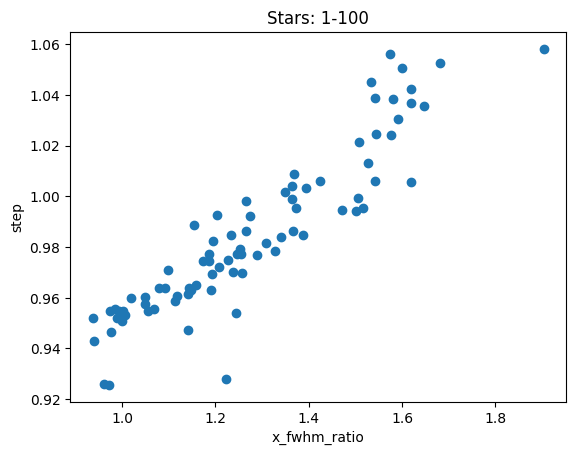

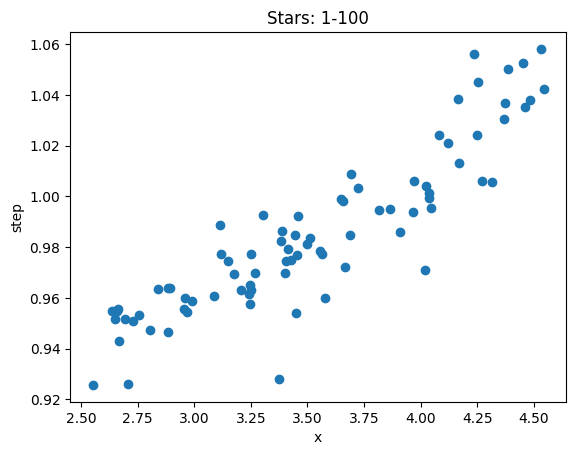

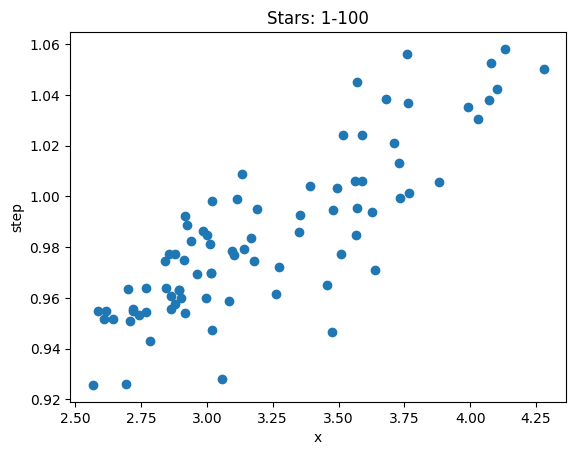

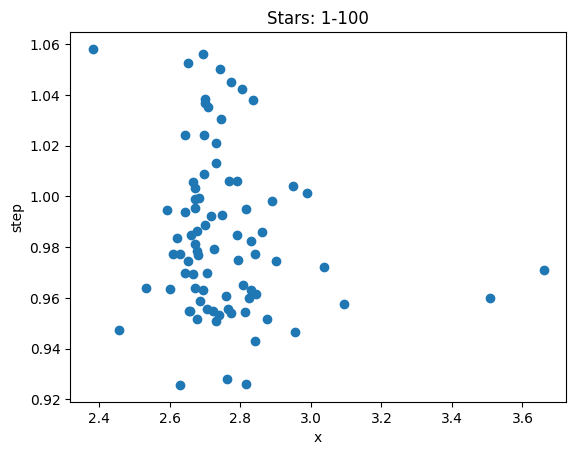

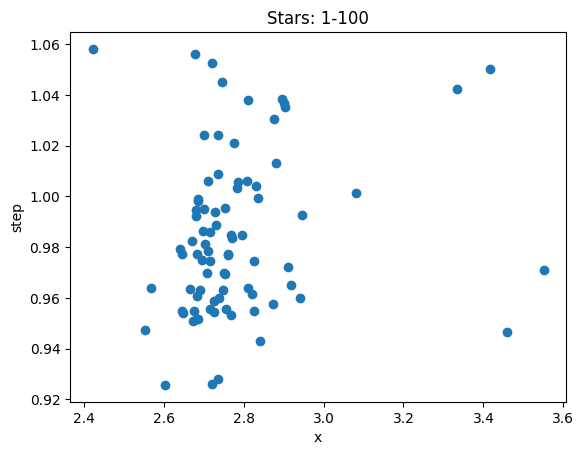

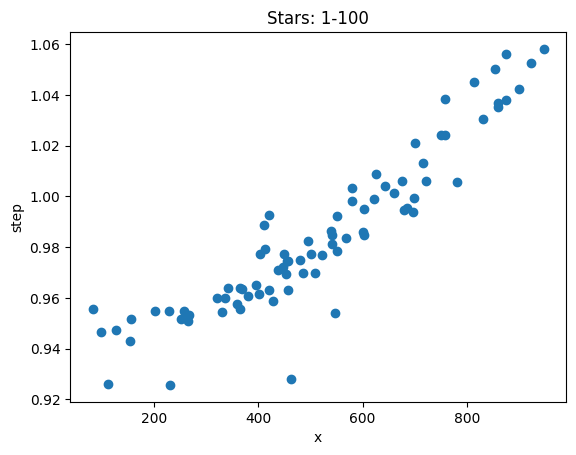

In [39]:
chart(1, 100)

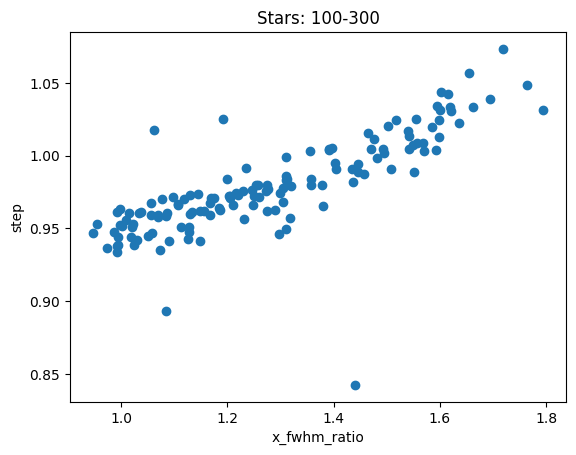

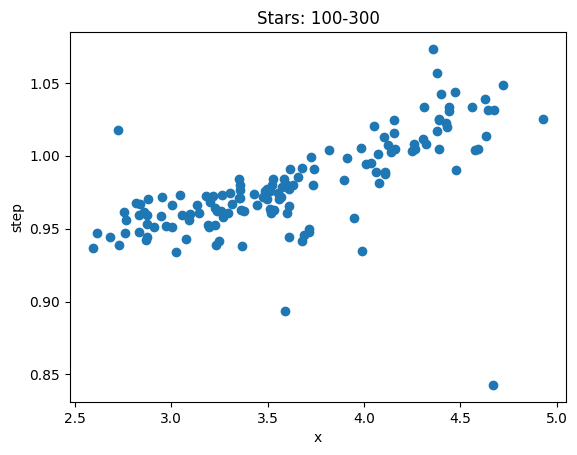

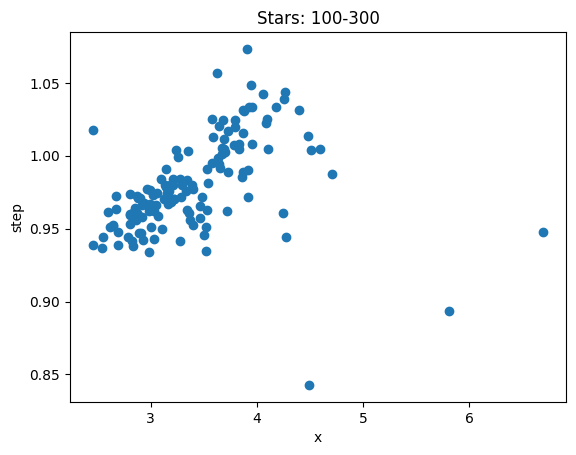

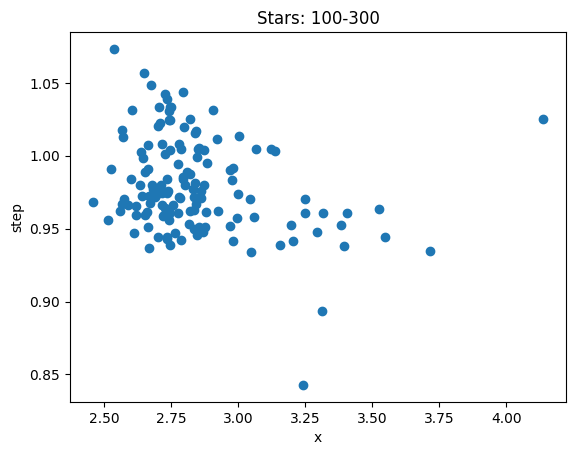

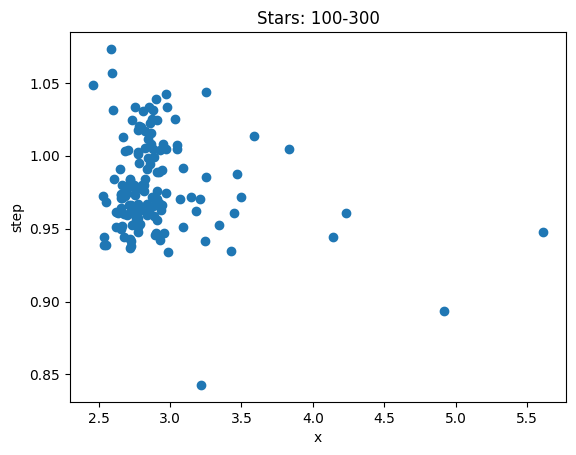

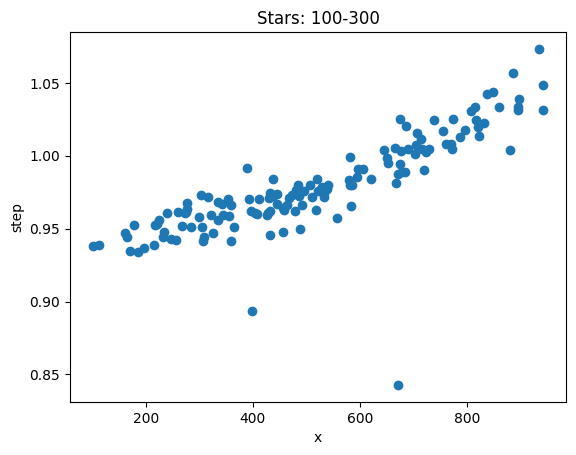

In [40]:
chart(100, 300)

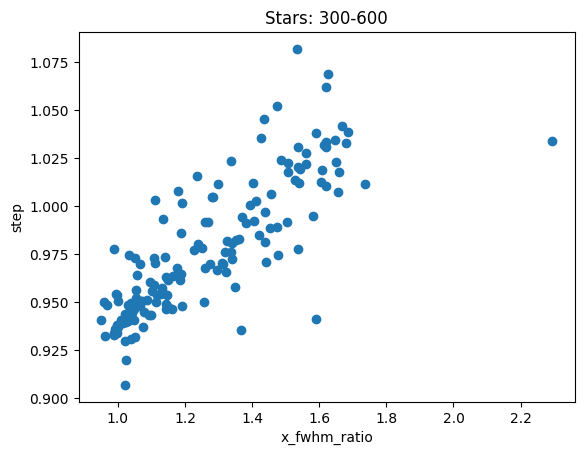

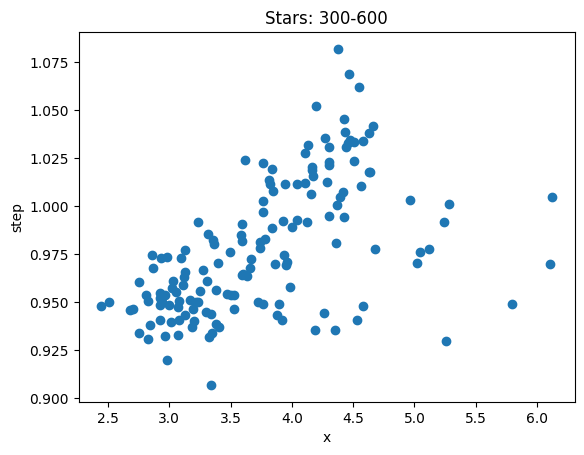

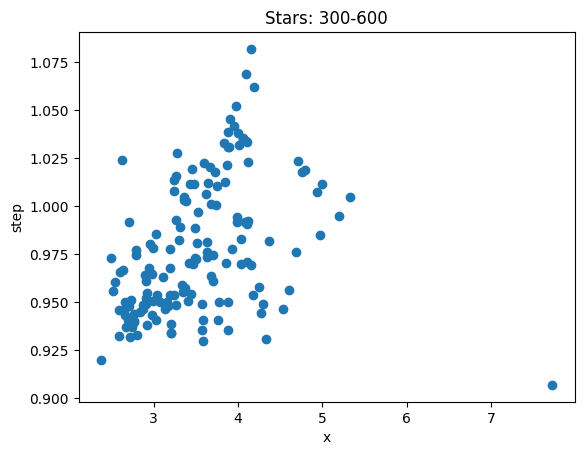

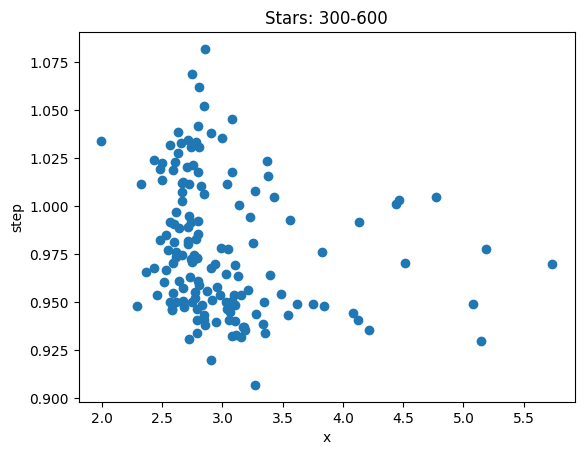

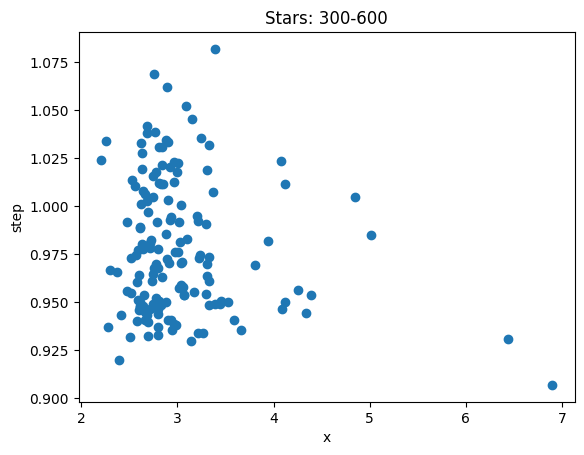

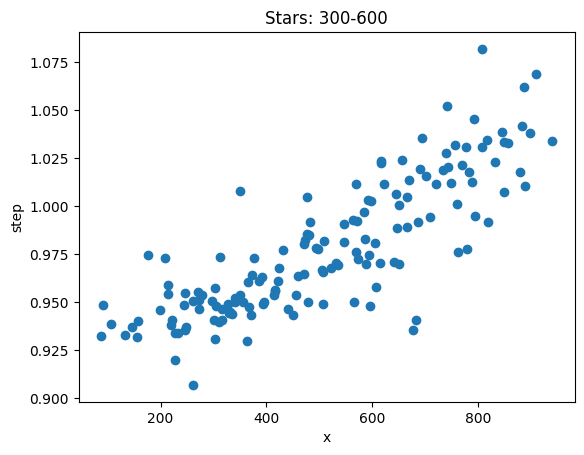

In [41]:
chart(300, 600)

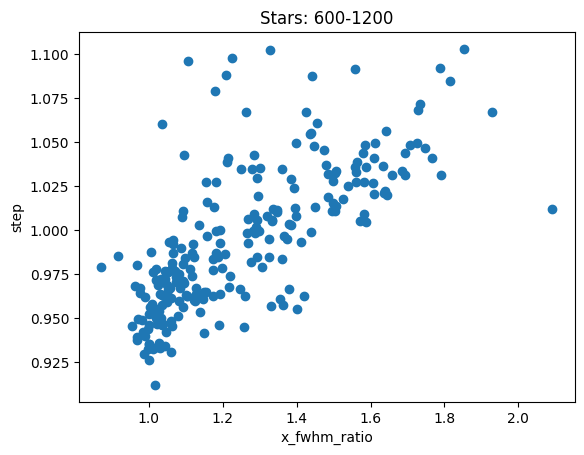

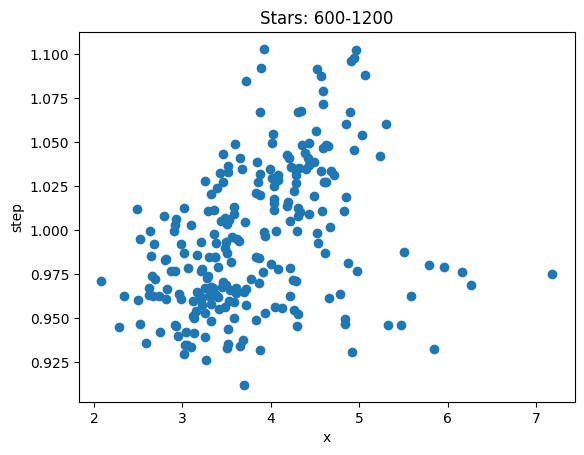

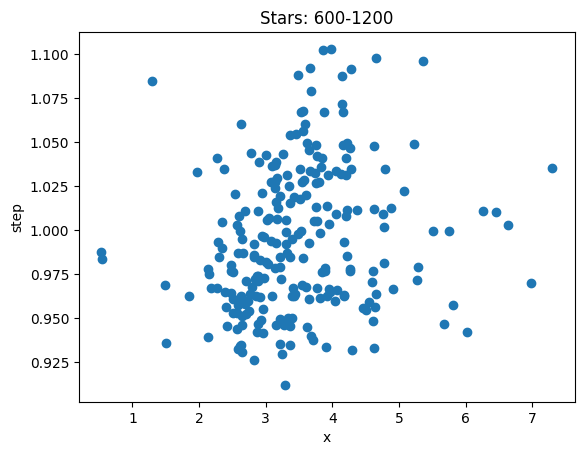

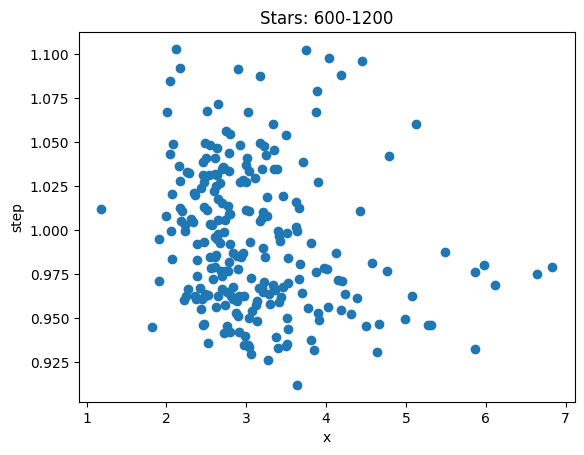

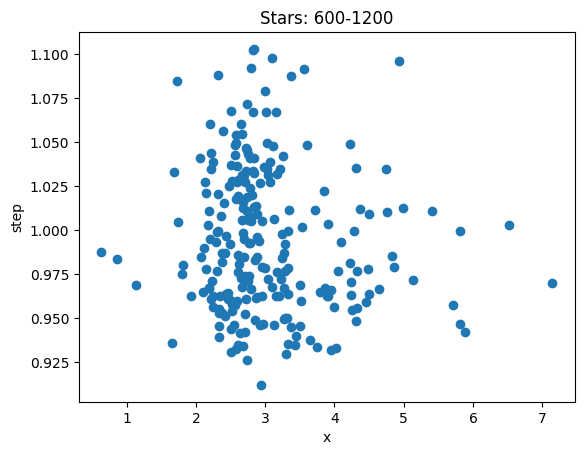

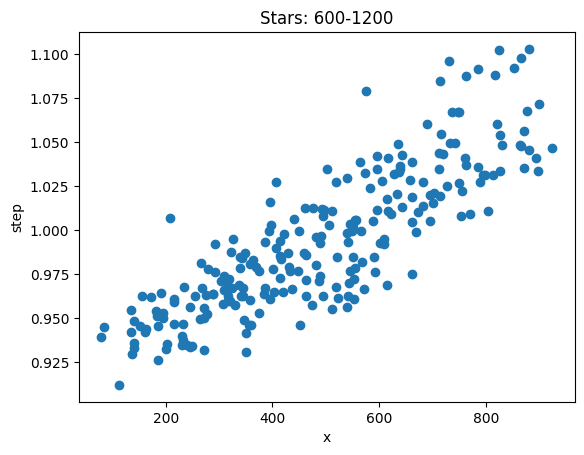

In [42]:
chart(600, 1200)

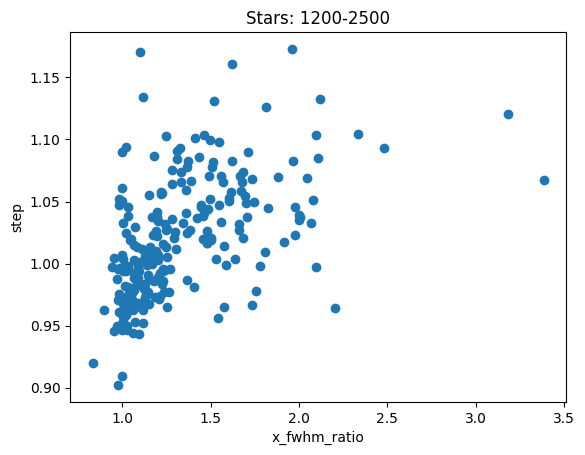

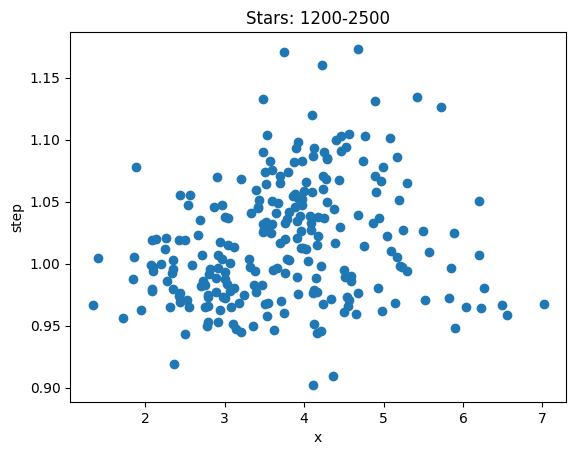

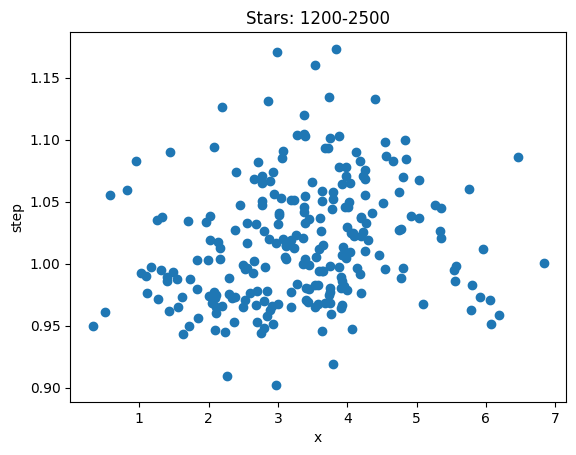

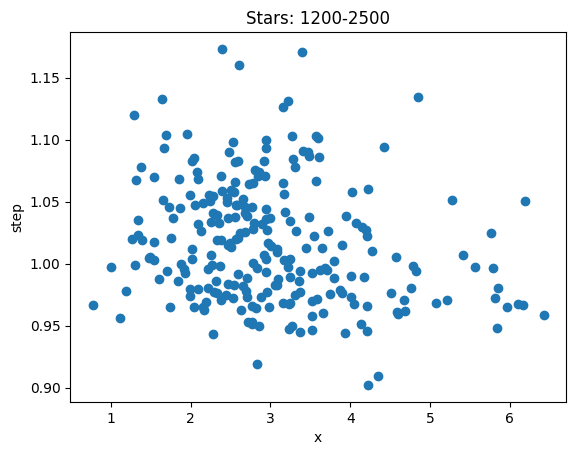

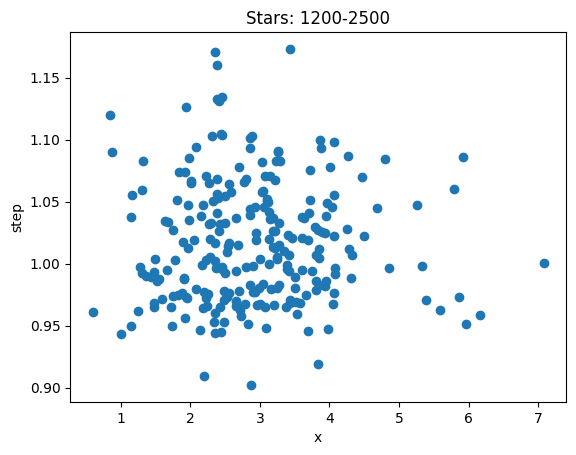

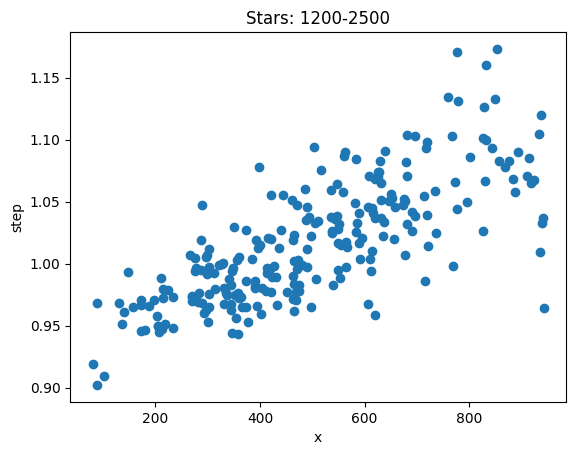

In [43]:
chart(1200, 2500)

In [44]:
df_refiltered.corr()

,x_fwhm_2011,y_fwhm_2011,avg_fwhm_2011,x_fwhm_2012,y_fwhm_2012,avg_fwhm_2012,x,y,step,x_fwhm_ratio,y_fwhm_ratio,avg_fwhm_ratio
x_fwhm_2011,1.000000,0.309053,0.309053,0.700742,0.057117,0.057117,0.535947,0.107547,0.353334,0.244052,0.414932,0.414932
y_fwhm_2011,0.309053,1.000000,1.000000,0.070436,0.842995,0.842995,0.342746,0.121557,0.199648,0.242960,0.360672,0.360672
avg_fwhm_2011,0.309053,1.000000,1.000000,0.070436,0.842995,0.842995,0.342746,0.121557,0.199648,0.242960,0.360672,0.360672
x_fwhm_2012,0.700742,0.070436,0.070436,1.000000,0.126155,0.126155,-0.142931,-0.008506,-0.165524,-0.482141,-0.100171,-0.100171
y_fwhm_2012,0.057117,0.842995,0.842995,0.126155,1.000000,1.000000,-0.060569,0.062074,-0.060104,-0.105522,-0.142547,-0.142547
avg_fwhm_2012,0.057117,0.842995,0.842995,0.126155,1.000000,1.000000,-0.060569,0.062074,-0.060104,-0.105522,-0.142547,-0.142547
x,0.535947,0.342746,0.342746,-0.142931,-0.060569,-0.060569,1.000000,0.059929,0.740725,0.771276,0.666912,0.666912
y,0.107547,0.121557,0.121557,-0.008506,0.062074,0.062074,0.059929,1.000000,0.285504,0.137368,0.092987,0.092987
step,0.353334,0.199648,0.199648,-0.165524,-0.060104,-0.060104,0.740725,0.285504,1.000000,0.635654,0.452283,0.452283
x_fwhm_ratio,0.244052,0.242960,0.242960,-0.482141,-0.105522,-0.105522,0.771276,0.137368,0.635654,1.000000,0.631833,0.631833
